# Prophet: Forecasting Air Passenger Numbers

**Background:** The hotel is interested in further analysing travel trends for customers based in the United States. As opposed to analysing their booking data directly, they would like to forecast potential travel interest to Europe at a more macroeconomic level.

The manager notes from previous surveys that many American customers who previously stayed at their hotel travelled to Portugal via London with British Airways.

You are tasked with building a Prophet model that can forecast passenger numbers travelling from San Francisco to London with British Airways as accurately as possible. The documentation for the Prophet model is available below. 

[Facebook: Prophet Documentation](https://facebook.github.io/prophet/)

The dataset for this example was extracted from the full dataset for air traffic passenger statistics from [DataSF](https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet
Prophet()

from fbprophet.plot import plot_plotly, add_changepoints_to_plot

import plotly.offline as py
py.init_notebook_mode()

In [3]:
df = pd.read_csv('/Users/dmr/Projects/bayes-modeling/#2 prophet/british '
                'airways.csv')
df.shape

(129, 2)

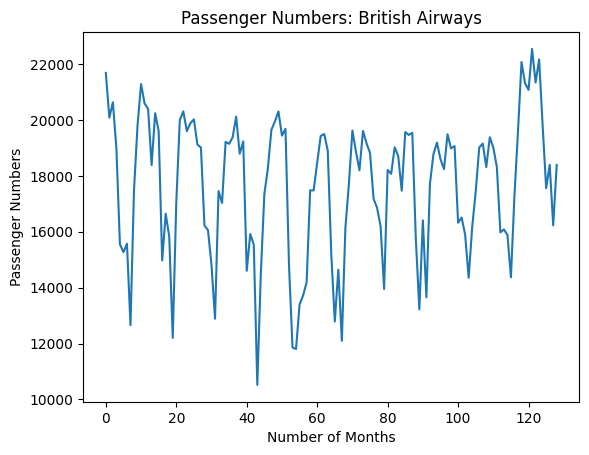

In [4]:
plt.plot(df['Adjusted Passenger Count'])
plt.title("Passenger Numbers: British Airways")
plt.xlabel("Number of Months")
plt.ylabel("Passenger Numbers")
plt.show()

In [5]:
train_df, test_df = df[:115], df[115:129]

In [6]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = train_df['Date']
train_dataset['y']= train_df['Adjusted Passenger Count']
train_dataset

ds      y
0    2005-07-01  21686
1    2005-08-01  20084
2    2005-09-01  20635
3    2005-10-01  18988
4    2005-11-01  15554
..          ...    ...
110  2014-09-01  19011
111  2014-10-01  18321
112  2014-11-01  15979
113  2014-12-01  16084
114  2015-01-01  15889

[115 rows x 2 columns]

In [7]:
prophet = Prophet()
prophet.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.2371
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       295.932   0.000695738       88.2937       0.596       0.596      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       296.092   1.31541e-05       92.4184      0.3682      0.3682      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       296.319    5.9669e-05       79.8147           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       296.354   4.25829e-06       82.8153   5.175e-08       0.001      523  LS failed, Hessian reset 
     399       296.354   2.62097e-06       71.5555           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     429       296.354   1.05497e-08     

In [8]:
future = prophet.make_future_dataframe(periods=14, freq='M')
future

ds
0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
..         ...
124 2015-10-31
125 2015-11-30
126 2015-12-31
127 2016-01-31
128 2016-02-29

[129 rows x 1 columns]

In [9]:
forecast = prophet.predict(future)
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2005-07-01  18536.250142  18866.095343  21248.912139  18536.250142   
1   2005-08-01  18505.182321  19372.027941  21880.577227  18505.182321   
2   2005-09-01  18474.114499  19108.153969  21613.960572  18474.114499   
3   2005-10-01  18444.048866  18820.553385  21225.118388  18444.048866   
4   2005-11-01  18412.981044  15052.290623  17651.513190  18412.981044   
..         ...           ...           ...           ...           ...   
124 2015-10-31  18090.878447  16083.973309  18611.416299  18065.271043   
125 2015-11-30  18108.518692  16441.041949  18824.989467  18078.801817   
126 2015-12-31  18126.746946  13723.506003  16224.002389  18092.625872   
127 2016-01-31  18144.975199  12794.491908  15158.741557  18106.396213   
128 2016-02-29  18162.027436  14613.364072  17138.507413  18119.224391   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    18536.250142     1585.310029           1585.310029           1585.310029   
1    18505.182321     2124.742086           2124.742086           2124.742086   
2    18474.114499     1891.918021           1891.918021           1891.918021   
3    18444.048866     1675.442205           1675.442205           1675.442205   
4    18412.981044    -2009.102931          -2009.102931          -2009.102931   
..            ...             ...                   ...                   ...   
124  18117.163511     -713.598591           -713.598591           -713.598591   
125  18138.848490     -434.340832           -434.340832           -434.340832   
126  18161.627484    -3137.997284          -3137.997284          -3137.997284   
127  18184.188446    -4096.396803          -4096.396803          -4096.396803   
128  18206.395831    -2275.355721          -2275.355721          -2275.355721   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    1585.310029   1585.310029   1585.310029                   0.0   
1    2124.742086   2124.742086   2124.742086                   0.0   
2    1891.918021   1891.918021   1891.918021                   0.0   
3    1675.442205   1675.442205   1675.442205                   0.0   
4   -2009.102931  -2009.102931  -2009.102931                   0.0   
..           ...           ...           ...                   ...   
124  -713.598591   -713.598591   -713.598591                   0.0   
125  -434.340832   -434.340832   -434.340832                   0.0   
126 -3137.997284  -3137.997284  -3137.997284                   0.0   
127 -4096.396803  -4096.396803  -4096.396803                   0.0   
128 -2275.355721  -2275.355721  -2275.355721                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  20121.560171  
1                           0.0                         0.0  20629.924407  
2                           0.0                         0.0  20366.032520  
3                           0.0                         0.0  20119.491070  
4                           0.0                         0.0  16403.878113  
..                          ...                         ...           ...  
124                         0.0                         0.0  17377.279856  
125                         0.0                         0.0  17674.177861  
126                         0.0                         0.0  14988.749661  
127                         0.0                         0.0  14048.578396  
128                         0.0                         0.0  15886.671714  

[129 rows x 16 columns]

In [10]:
y_hat = forecast['yhat']
y_hat_future = y_hat[115:129]
print(y_hat_future.shape)
test = test_df['Adjusted Passenger Count']
print(test.shape)

(14,)
(14,)


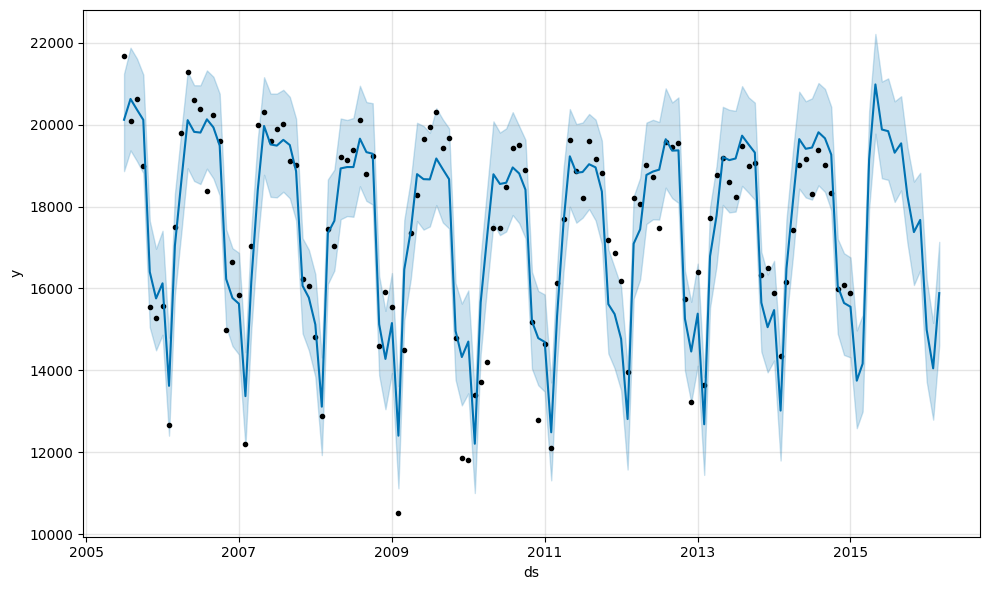

In [11]:
fig1 =prophet.plot(forecast)

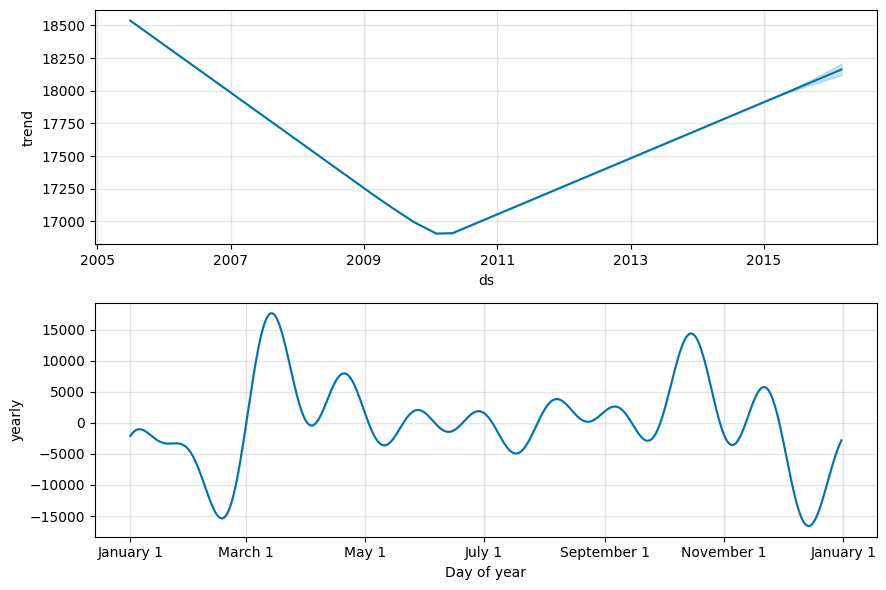

In [12]:
fig2 = prophet.plot_components(forecast)

In [13]:
mse = mean_squared_error(test, y_hat_future)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2278.229890


In [14]:
np.mean(df['Adjusted Passenger Count'])

17645.527131782947

After creating the original model, a set number of changepoints (or points that mark a significant change in trend) are defined.

While these changepoints would hve been selected automatically in the original model, manual selection of changepoints by trial and error is performed in an attempt to further reduce the RMSE (root mean squared error).

It is found that a selection of 16 changepoints reduces the RMSE from **2226** to **2177**.

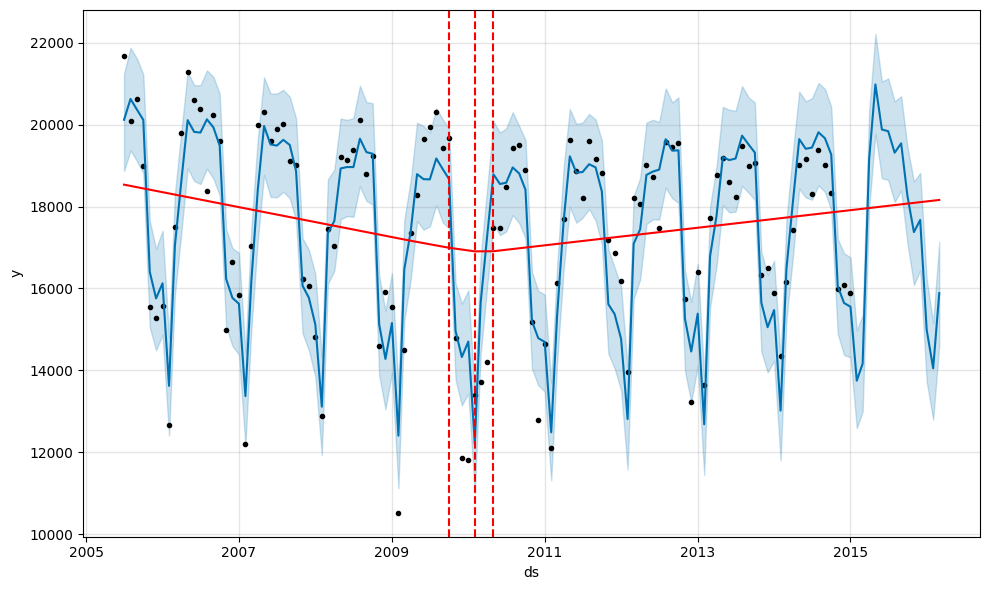

In [15]:
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

In [16]:
len(prophet.changepoints)

25

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.2371
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        295.35    0.00260854       66.5741           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       295.868   0.000730472       61.2803   1.047e-05       0.001      287  LS failed, Hessian reset 
     199       295.893   0.000388895       75.1782           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       295.977   2.88813e-05       69.1746    4.15e-07       0.001      377  LS failed, Hessian reset 
     269       295.979   6.97821e-09       69.7087      0.3677           1      430   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


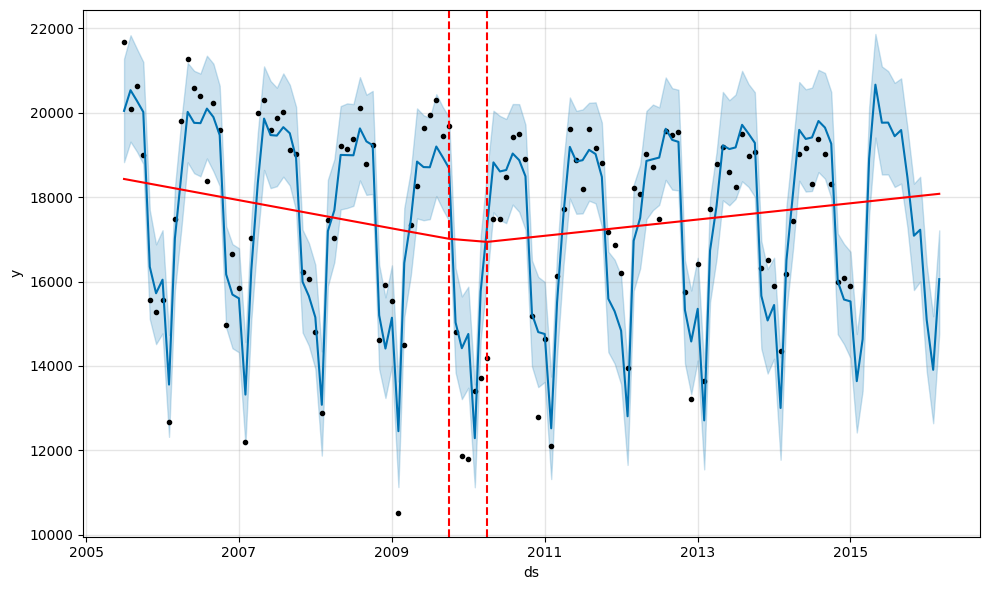

In [17]:
pro_change = Prophet(n_changepoints=16)
forecast = pro_change.fit(train_dataset).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [18]:
len(pro_change.changepoints)

16

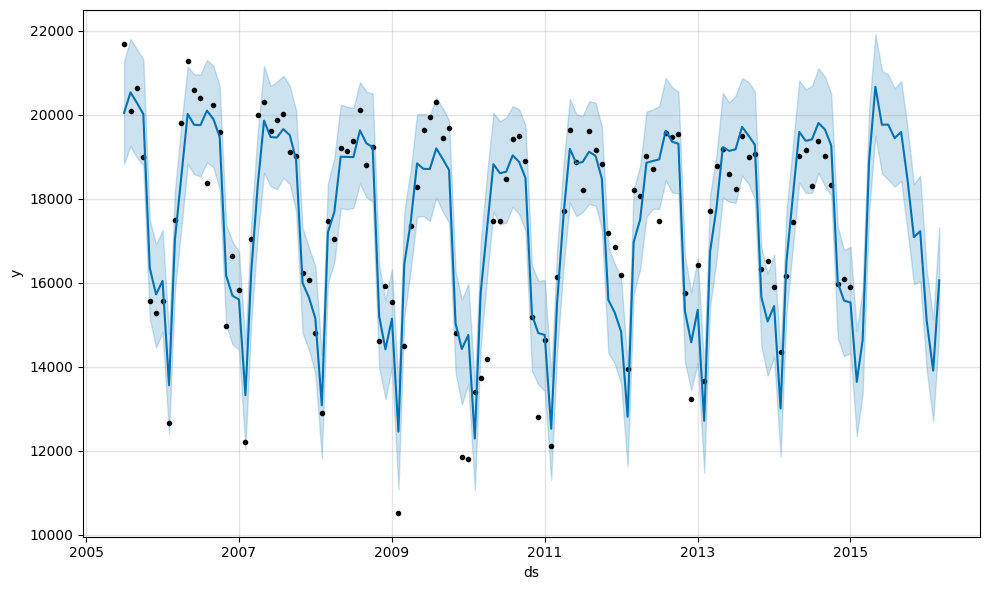

In [19]:
# pro_change.fit(train_dataset)
future_data = pro_change.make_future_dataframe(periods=14, freq = 'm')

#forecast the data for future data
forecast_16cp = pro_change.predict(future_data)
pro_change.plot(forecast_16cp);

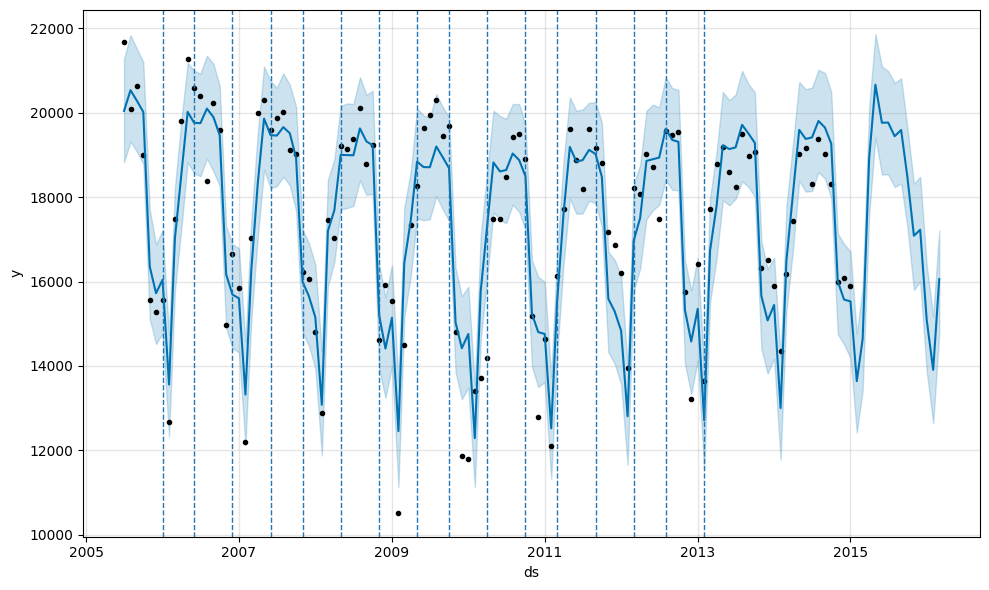

In [20]:
import matplotlib.pyplot as plt

figure = pro_change.plot(forecast)
for changepoint in pro_change.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [21]:
y_hat = forecast_16cp['yhat']
y_hat_upper = forecast_16cp['yhat_upper']
y_hat_lower = forecast_16cp['yhat_lower']

y_hat_new = y_hat[115:129]
print(y_hat_new.shape)

y_hat_upper_new = y_hat_upper[115:129]
y_hat_lower_new = y_hat_lower[115:129]

test = test_df['Adjusted Passenger Count']
print(test.shape)

(14,)
(14,)


In [22]:
mse = mean_squared_error(test, y_hat_new)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2234.166151


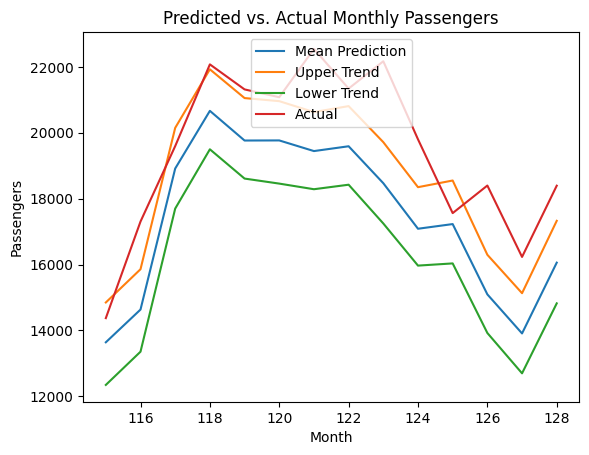

In [23]:
preds = plt.plot(y_hat_new, label='Mean Prediction')
upper = plt.plot(y_hat_upper_new, label='Upper Trend')
lower = plt.plot(y_hat_lower_new, label='Lower Trend')
actual = plt.plot(test, label='Actual')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title("Predicted vs. Actual Monthly Passengers")
plt.legend(loc = 'upper center')
plt.show()

Full Bayesian analysis is now incorporated into the Prophet model to better analyse the uncertainty in trend and seasonality.

The *interval_width* is used to define the bounds of the lower and upper trends, i.e. the higher the setting, the higher the bounds.

*mcmc_samples* models the uncertainty in seasonality - whereas generating the model without this parameter will only model the uncertainty in trend and observation noise.

More information can be found on the model configuration here: [Prophet: Uncertainty Intervals](https://facebook.github.io/prophet/docs/uncertainty_intervals.html)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Gradient evaluation took 0.000112 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000238 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.38 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000161 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 0.000161 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.61 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of th

Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 600 

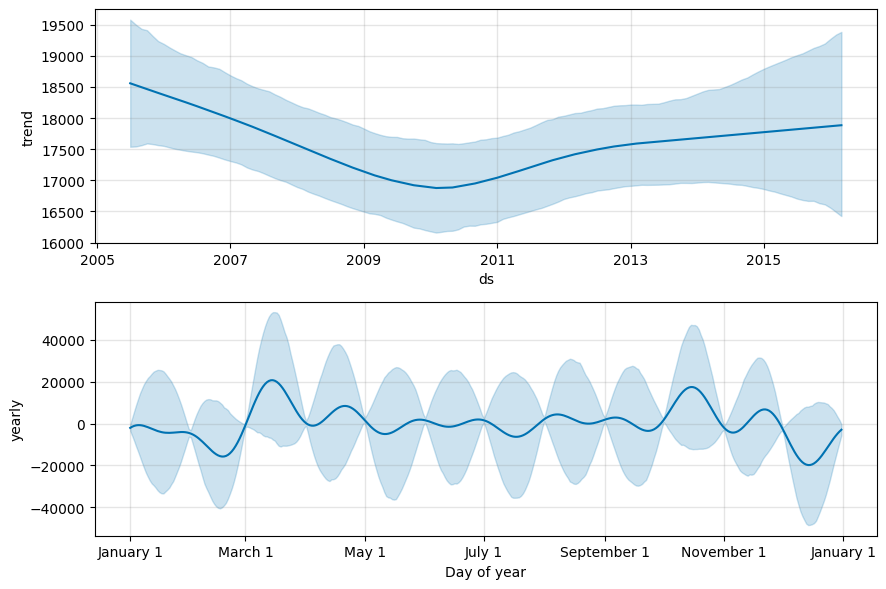

In [24]:
import multiprocessing
multiprocessing.set_start_method("fork")

b = Prophet(mcmc_samples=1000, interval_width=0.99)
forecast_bayesian = b.fit(train_dataset).predict(future)
fig = b.plot_components(forecast_bayesian)

In [25]:
y_hat_bayes = forecast_bayesian['yhat']
y_hat_upper_bayes = forecast_bayesian['yhat_upper']
y_hat_lower_bayes =forecast_bayesian['yhat_lower']

y_hat_bayes_new=y_hat_bayes[115:129]
y_hat_upper_bayes_new=y_hat_upper[115:129]
y_hat_lower_bayes_new = y_hat_lower[115:129]

In [26]:
mse = mean_squared_error(test, y_hat_bayes_new)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2553.336742


With the interval_width set to 0.99 (an extreme value), it is observed that the lower trend shows a minimum value of just under 10,000. This is the value that the model anticipates would be a lower limit in the case that passenger numbers were to drop sharply for some reason.

In this example, the actual passenger numbers lie much closer to the upper trend as opposed to the lower, but the purpose of incorporating Bayesian analysis into the Prophet model is to conduct a scenario analysis of potential fluctuations in air passenger numbers.

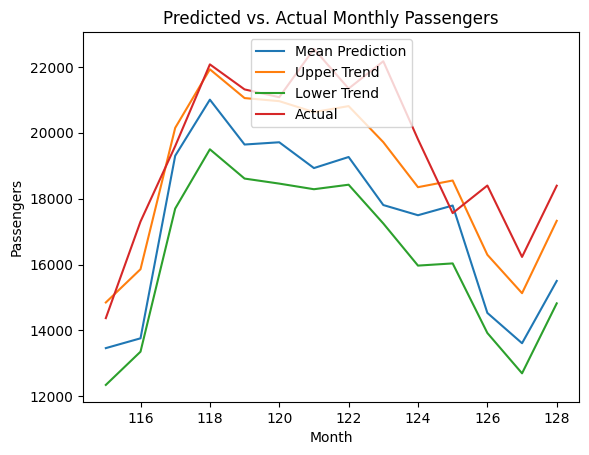

In [27]:
+preds = plt.plot(y_hat_bayes_new, label='Mean Prediction')
upper = plt.plot(y_hat_upper_bayes_new, label='Upper Trend')
lower = plt.plot(y_hat_lower_bayes_new, label='Lower Trend')
actual = plt.plot(test, label='Actual')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title("Predicted vs. Actual Monthly Passengers")
plt.legend(loc = 'upper center')
plt.show()